In [172]:
import keras
import pandas as pd
import tensorflow.keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization

%matplotlib inline

In [114]:
df=pd.read_csv('mushrooms.csv')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [115]:
df.shape

(8124, 23)

In [116]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [117]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [118]:
# Check for null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [119]:
pd.value_counts(df.values.flatten())

w    22906
p    22788
f    21494
s    14524
e    13408
n    12868
b    12648
t     8584
o     8080
c     8020
k     7784
y     7086
g     5896
v     4040
x     3656
d     3148
l     2528
?     2480
h     2364
a      994
u      924
m      328
r      304
dtype: int64

## Model No. 1

In [120]:
df2 = pd.get_dummies(df)

In [121]:
df2.columns

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=119)

In [122]:
df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [123]:
df2.columns

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=119)

In [124]:
del df2["class_p"]

In [125]:
df2.head()

,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [126]:
df2.rename(columns = {'class_e':'CLASS'}, inplace = True)

In [127]:
df2

,CLASS,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,1,0,

## Explanation of the columns and what they mean

The binary column "CLASS" is 1 if poisonis and 0 for edible. The cap-shape column became capshape_b, capshape_c, capshape_x, capshape_f, capshape_k and capshape_s. These correlate with binary columns, 0 if it is not that shape and 1 if it is a cap shape. capshape_b column stands for bell, capshape_c = conical, capshape_x = convex, capshape_f = flat, capshape_k = knobbed and capshape_s = sunken.

The cap-surface became four different binary columns that stand for fibrous(f), grooves(g), scaly(y), and smooth(s), with a 1 if the cap surface is that type, and a 0 if it is not. The cap-color column became 10 new binary columns. The brown cap color column became cap-color_n, buff=cap-color_b, cinnamon = c, grey = g, green = r, pink = p, purple = u, red = e, white = w, and yellow = y. With the same respective 0's if it is not that color and 1's if it is.

The bruises column is t for true, there are bruises and f for false, if there are not bruises. Column bruises_t is 0 if the mushroom does not have any bruises, 1 if it does, and vice versa for the bruises_f column. The new odor column will an a if it resembles an almond, l = anise, c = creosot, y = fishy, f = foul, m = musty, n = no oder, p = pungent, and s = spicy odor. These columns will show a 1 if the mushroom has that smell and a 0 if it does not.

The gill-attachment split to four different binary columns. a = attached gill, d = descending, f = free gill, and n = notched gill. These columns will have 0 if they do not have that type of gill attachment and 1 if they do. Gill-spacing became three new columns, gill_spacing_c = close, gill_spacing_w = crowded and gill_spacing_d for distant. These binaries work the same as the gill attchment 0's and 1's. Gill size became gill_size_b = broad and gill_size_n = narrow. Gill-color became k = black, n = brown, b = buff, h = chocolate, g = gray, r = green, o = orange, p = pink, u = purple, e = red, w = white, and y = yellow. 

Stalk shape became e for enlarging shape and t for a tapering shape. Stalk-root split into seven binary columns; b = bulbous, c = cup, e = equal, z = rhizomorp, r = root and then ? for missing values. The stalk-surface-above-ring is now four descriptive columns. f = fibrous, y = scaly, k = silky and s = smooth. Stalk-surface-below-ring has the same new variables as stalk-surface-above-ring. Stalk-color-above-ring and stalk-color-below-ring became; n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, and y = yellow.

Veil-type is now veil-type_p for partial and veil-type_u for universal. Veil-color's binary columns are; n = brown, o = orange, w = white and y = yellow. Ring-number now has n for none, o for one and t for two rings. There is also a multitude for new ring-rype binary columns. c for cobwebby ring types, e for evanescent, f for flaring, l for large, n for none, p for pendant, s for sheathing, and z for zone. 

The spore-pint-color column became 9 binary columns; k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, and y = yellow. The population column became 6 binary columns; a = abundant population, c = clustered, n = numerous, s = scattered, v = several and y = solitary. Finally, the habitat column became 7 binary columns; g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste, and d = woods. 

For each binary column in the new dataset, 1 = True/ has that characteristic and 0 = False/ does not have that characteristic.

In [128]:
# Looking at every column
pd.set_option('display.max_columns', None)
df2.head()

,CLASS,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [129]:
# Creating the train and test sets

X1 = df2[['cap-shape_b','cap-shape_c','cap-shape_f','cap-shape_k','cap-shape_s','cap-shape_x',\
          'cap-color_b','cap-color_b','cap-color_c','cap-color_e','cap-color_g','cap-color_n',\
          'cap-color_p','cap-color_r','cap-color_u','cap-color_w','cap-color_y','bruises_f']]
y1 = df2['CLASS']

In [130]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, \
        random_state = 0)

In [131]:
X1_train.shape

(6499, 18)

In [132]:
X1_test.shape

(1625, 18)

In [133]:
# Number of columns in train set
X1_train.shape[1]

18

In [134]:
X1_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cap-shape_b,6499.0,0.055085,0.228164,0.0,0.0,0.0,0.0,1.0
cap-shape_c,6499.0,0.000462,0.021482,0.0,0.0,0.0,0.0,1.0
cap-shape_f,6499.0,0.390983,0.488008,0.0,0.0,0.0,1.0,1.0
cap-shape_k,6499.0,0.102016,0.302692,0.0,0.0,0.0,0.0,1.0
cap-shape_s,6499.0,0.003847,0.061907,0.0,0.0,0.0,0.0,1.0
cap-shape_x,6499.0,0.447607,0.497286,0.0,0.0,0.0,1.0,1.0
cap-color_b,6499.0,0.020465,0.141594,0.0,0.0,0.0,0.0,1.0
cap-color_b,6499.0,0.020465,0.141594,0.0,0.0,0.0,0.0,1.0
cap-color_c,6499.0,0.005539,0.074226,0.0,0.0,0.0,0.0,1.0
cap-color_e,6499.0,0.187413,0.390273,0.0,0.0,0.0,0.0,1.0


In [135]:
# Initialising the ANN
model1 = Sequential()

model1.add(Dense(units = 512, kernel_initializer = 'uniform', \
                     activation = 'relu', input_dim = 18))

model1.add(Dense(units=512,kernel_initializer='uniform',\
                     activation='relu'))

model1.add(Dense(units=1,kernel_initializer='uniform',\
                     activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy',\
                   metrics=['accuracy','mean_squared_error', 'mae'])


early_stopping=tensorflow.keras.callbacks.EarlyStopping(patience=2)

history = model1.fit(X1_train, y1_train, batch_size = 80, epochs = 50,\
               validation_data=(X1_test,y1_test),verbose=2,callbacks=[early_stopping])

y1_pred = model1.predict(X1_test)
y1_pred = (y1_pred > 0.5)

cm1 = confusion_matrix(y1_test, y1_pred)

Train on 6499 samples, validate on 1625 samples
Epoch 1/50
6499/6499 - 2s - loss: 0.4623 - accuracy: 0.7900 - mean_squared_error: 0.1530 - mae: 0.3152 - val_loss: 0.3553 - val_accuracy: 0.8388 - val_mean_squared_error: 0.1151 - val_mae: 0.2520
Epoch 2/50
6499/6499 - 0s - loss: 0.3658 - accuracy: 0.8240 - mean_squared_error: 0.1211 - mae: 0.2413 - val_loss: 0.3392 - val_accuracy: 0.8295 - val_mean_squared_error: 0.1112 - val_mae: 0.2327
Epoch 3/50
6499/6499 - 1s - loss: 0.3510 - accuracy: 0.8294 - mean_squared_error: 0.1161 - mae: 0.2319 - val_loss: 0.3341 - val_accuracy: 0.8295 - val_mean_squared_error: 0.1104 - val_mae: 0.2244
Epoch 4/50
6499/6499 - 0s - loss: 0.3499 - accuracy: 0.8327 - mean_squared_error: 0.1163 - mae: 0.2307 - val_loss: 0.3316 - val_accuracy: 0.8431 - val_mean_squared_error: 0.1093 - val_mae: 0.2197
Epoch 5/50
6499/6499 - 0s - loss: 0.3448 - accuracy: 0.8378 - mean_squared_error: 0.1142 - mae: 0.2278 - val_loss: 0.3314 - val_accuracy: 0.8431 - val_mean_squared_erro

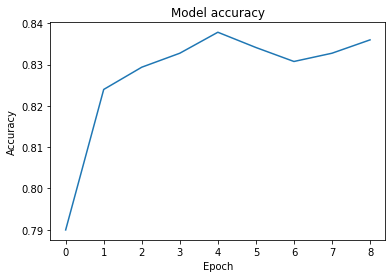

In [136]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

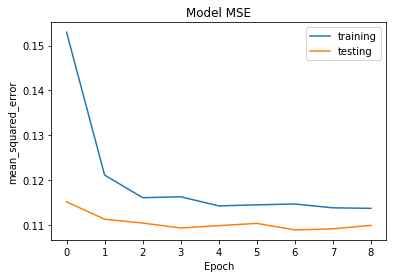

In [137]:
plt.plot(history.history['mean_squared_error'], label='training')
plt.plot(history.history['val_mean_squared_error'], label='testing')
plt.title('Model MSE')
plt.legend()
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.show()

In [148]:
pred_classes = model1.predict_classes(X1_train)

In [149]:
confusion_matrix(y1_train,pred_classes)

array([[2790,  353],
       [ 696, 2660]], dtype=int64)

In [150]:
pred_classes = model1.predict_classes(X1_test)

In [151]:
confusion_matrix(y1_test,pred_classes)

array([[682,  91],
       [164, 688]], dtype=int64)

In [152]:
target_names=['poison','edible'] # b/c 0=poison, 1=edible
print(classification_report(y1_test, pred_classes, target_names=target_names))

              precision    recall  f1-score   support

      poison       0.81      0.88      0.84       773
      edible       0.88      0.81      0.84       852

    accuracy                           0.84      1625
   macro avg       0.84      0.84      0.84      1625
weighted avg       0.85      0.84      0.84      1625



In [153]:
# Two new mushrooms - with all features:
new_data = ([[0,1,0,0,1,1,1,0,0,1,0,1,0,1,1,1,1,0], [1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,1]])

In [154]:
prob_prediction = model1.predict_proba(new_data)
prob_prediction

array([[1.        ],
       [0.99999857]], dtype=float32)

In [155]:
class_prediction = model1.predict_classes(new_data)
class_prediction

array([[1],
       [1]])

In [156]:
df2.head()

,CLASS,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Analysis: Model No. 1 was not a good predictor if the mushrooms are poisonous or edible. I would not safely use this to judge or predict the condition of mushroom so I will continue to Model No. 2 to try and improve this model. Before i change the number of epochs, hidden layers and more, i will first try to find the best variables to use for predictors.

## Model No. 2

In [173]:
df2.head()

,CLASS,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [174]:
X2 = df2[['cap-shape_b','cap-shape_c','cap-shape_f','cap-shape_k','cap-shape_s','cap-shape_x',\
          'cap-color_b','cap-color_b','cap-color_c','cap-color_e','cap-color_g','cap-color_n',\
          'cap-color_p','cap-color_r','cap-color_u','cap-color_w','cap-color_y','bruises_f',\
         'odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y',\
         'gill-color_b','gill-color_e','gill-color_g','gill-color_h','gill-color_k','gill-color_n','gill-color_o',\
         'gill-color_p','gill-color_r','gill-color_u','gill-color_w','gill-color_y']]
y2 = df2['CLASS']

In [175]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, \
        random_state = 0)

In [176]:
X2_train.shape

(6499, 39)

In [177]:
X2_test.shape

(1625, 39)

In [178]:
X2_train.shape[1]

39

In [179]:
X2_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cap-shape_b,6499.0,0.055085,0.228164,0.0,0.0,0.0,0.0,1.0
cap-shape_c,6499.0,0.000462,0.021482,0.0,0.0,0.0,0.0,1.0
cap-shape_f,6499.0,0.390983,0.488008,0.0,0.0,0.0,1.0,1.0
cap-shape_k,6499.0,0.102016,0.302692,0.0,0.0,0.0,0.0,1.0
cap-shape_s,6499.0,0.003847,0.061907,0.0,0.0,0.0,0.0,1.0
cap-shape_x,6499.0,0.447607,0.497286,0.0,0.0,0.0,1.0,1.0
cap-color_b,6499.0,0.020465,0.141594,0.0,0.0,0.0,0.0,1.0
cap-color_b,6499.0,0.020465,0.141594,0.0,0.0,0.0,0.0,1.0
cap-color_c,6499.0,0.005539,0.074226,0.0,0.0,0.0,0.0,1.0
cap-color_e,6499.0,0.187413,0.390273,0.0,0.0,0.0,0.0,1.0


In [180]:
# Initialising the ANN
model2 = Sequential()

model2.add(Dense(512, kernel_initializer = 'uniform', \
                     activation = 'relu', input_dim = 39))

model2.add(Dense(512,kernel_initializer='uniform',\
                     activation='relu'))

model2.add(Dense(512, activation = 'relu', name='second_hidden'))

model2.add(Dense(512, activation = 'relu', name='third_hidden'))

model2.add(Dense(1,kernel_initializer='uniform',\
                     activation='sigmoid', name = 'output'))

model2.compile(optimizer='adam',loss='binary_crossentropy',\
                   metrics=['accuracy','mean_squared_error', 'mae'])

model2.summary() #4

early_stopping=tensorflow.keras.callbacks.EarlyStopping(patience=2)

history = model2.fit(X2_train, y2_train, batch_size = 80, epochs = 50,\
               validation_data=(X2_test,y2_test),verbose=2,callbacks=[early_stopping])

y2_pred = model2.predict(X2_test)
y2_pred = (y2_pred > 0.5)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               20480     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
second_hidden (Dense)        (None, 512)               262656    
_________________________________________________________________
third_hidden (Dense)         (None, 512)               262656    
_________________________________________________________________
output (Dense)               (None, 1)                 513       
Total params: 808,961
Trainable params: 808,961
Non-trainable params: 0
_________________________________________________________________
Train on 6499 samples, validate on 1625 samples
Epoch 1/50
6499/6499 - 2s - loss: 0.1019 - accuracy: 0.9782 - mean

In [181]:
history = model2.fit(X2_train, y2_train, batch_size = 10 , epochs = 25, verbose=0)

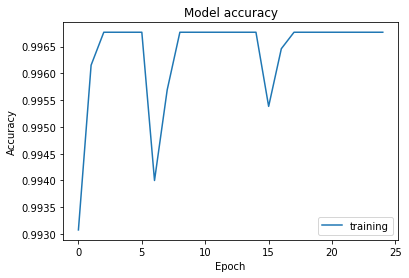

In [182]:
plt.plot(history.history['accuracy'], label='training')
#plt.plot(history.history['val_mean_squared_error'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

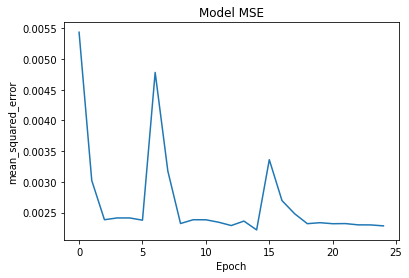

In [183]:
plt.plot(history.history['mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.show()

In [195]:
pred_classes = model2.predict_classes(X2_train)

In [196]:
confusion_matrix(y2_train,pred_classes)

array([[3122,   21],
       [   0, 3356]], dtype=int64)

In [197]:
pred_classes = model2.predict_classes(X2_test)

In [198]:
confusion_matrix(y2_test,pred_classes)

array([[770,   3],
       [  0, 852]], dtype=int64)

In [199]:
target_names=['poison','edible'] # 0=poison, 1=edible
print(classification_report(y2_test, pred_classes, target_names=target_names))

              precision    recall  f1-score   support

      poison       1.00      1.00      1.00       773
      edible       1.00      1.00      1.00       852

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [200]:
# Two new mushrooms....with all features:
new_data = ([[1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,\
                         0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0], \
                         [0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,\
                         0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]])

In [201]:
prob_prediction = model2.predict_proba(new_data)
prob_prediction

array([[0.02085401],
       [0.17986812]], dtype=float32)

In [202]:
# This predicts if each new_data mushroom is poisonous or not
class_prediction = model2.predict_classes(new_data)
class_prediction

array([[0],
       [0]])

Analysis: Model No. 2 has a 99% accuracy rate, this is really good! Now i will lower the amount of epoch's i run, take away one of the hidden layers, and try to make the model as parsimony as possible while not losing too much of the models accuracy. Model No.2 is a 'safe' model that i feel accurately predicts if a mushroom is poisonous or not. This model predicted both test mushrooms would be edible. 

## Mdodel No. 3

In [203]:
X3 = df2[['cap-shape_b','cap-shape_c','cap-shape_f','cap-shape_k','cap-shape_s','cap-shape_x','bruises_f',\
         'odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y',\
         'gill-color_b','gill-color_e','gill-color_g','gill-color_h','gill-color_k','gill-color_n','gill-color_o',\
         'gill-color_p','gill-color_r','gill-color_u','gill-color_w','gill-color_y']]
y3 = df2['CLASS']

In [204]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, \
        random_state = 0)

In [205]:
X3_train.shape

(6499, 28)

In [206]:
X3_test.shape

(1625, 28)

In [207]:
X3_train.shape[1]

28

In [208]:
# Initialising the ANN
model3 = Sequential()

model3.add(Dense(100, kernel_initializer = 'uniform', \
                     activation = 'relu', input_dim = 28))

model3.add(Dense(100,kernel_initializer='uniform',\
                     activation='relu'))

model3.add(Dense(100, activation = 'relu', name='second_hidden'))

# COMMENT OUT THIRD HIDDEN LAYER FOR NOW
#model3.add(Dense(100, activation = 'relu', name='third_hidden'))

model3.add(Dense(1,kernel_initializer='uniform',\
                     activation='sigmoid', name = 'output'))

model3.compile(optimizer='adam',loss='binary_crossentropy',\
                   metrics=['accuracy','mean_squared_error', 'mae'])

model3.summary() #4

early_stopping=tensorflow.keras.callbacks.EarlyStopping(patience=2)


# CHANGED EPOCHS FROM 50 TO 25 
history = model3.fit(X3_train, y3_train, batch_size = 80, epochs = 25,\
               validation_data=(X3_test,y3_test),verbose=2,callbacks=[early_stopping])

y3_pred = model3.predict(X3_test)
y3_pred = (y3_pred > 0.5)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               2900      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
second_hidden (Dense)        (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 1)                 101       
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________
Train on 6499 samples, validate on 1625 samples
Epoch 1/25
6499/6499 - 2s - loss: 0.3079 - accuracy: 0.9174 - mean_squared_error: 0.0977 - mae: 0.2217 - val_loss: 0.0411 - val_accuracy: 0.9883 - val_mean_squared_error: 0.0102 - val_mae: 0.0161
Epoc

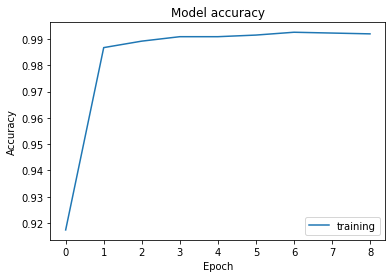

In [209]:
plt.plot(history.history['accuracy'], label='training')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

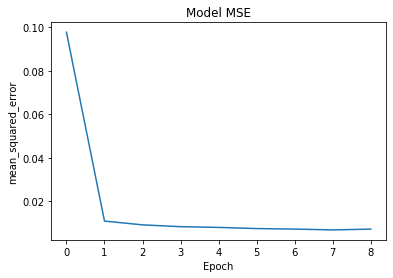

In [210]:
plt.plot(history.history['mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.show()

In [211]:
pred_classes = model3.predict_classes(X3_train)

In [212]:
confusion_matrix(y3_train,pred_classes)

array([[3095,   48],
       [   0, 3356]], dtype=int64)

In [213]:
pred_classes = model3.predict_classes(X3_test)

In [214]:
target_names=['poison','edible'] # b/c 0=poison, 1=edible
print(classification_report(y3_test, pred_classes, target_names=target_names))

              precision    recall  f1-score   support

      poison       1.00      0.99      1.00       773
      edible       0.99      1.00      1.00       852

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [215]:
# Two new mushrooms
new_data = ([[0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,
            0,0,0,0,0,1,0,0,0,0,0,0], \
            [0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,
            0,0,0,0,0,1,0,0,0,0,0,0]])

In [216]:
prob_prediction = model3.predict_proba(new_data)
prob_prediction

array([[0.00044157],
       [0.00010291]], dtype=float32)

In [217]:
class_prediction = model3.predict_classes(new_data)
class_prediction

array([[0],
       [0]])

***

# Preliminary Model Analysis

The objective of this project was to take the mushroom dataset, complete feature engineering on it and then develop the best model to predict if a mushroom is poisonous or edible. Before completing my feature engineering, i had to convert the dataset variable to binary values by using the get_dummies function. I go into greater length on the columns and their meaning in the "Understanding the columns and what they mean" section. 

The variables I used in Model No.1 includes; cap-shape_b, cap-shape_c, cap-shape_f, cap-shape_k, cap-shape_s, cap-shape_x, cap-color_b, cap-color_b, cap-color_c, cap-color_e, cap-color_g, cap-color_n, cap-color_p, cap-color_r, cap-color_u, cap-color_w, cap-color_y, and bruises_f. This original model was to simply see if cap color and shape with bruises as well, could predict if the mushroom is poisonous or not. As you may have been able to tell, it was not a good model to predict and we needed to increase the accuracy by a lot to call our model 'safe'.

The variables I used in Model No. 2 were as followed; cap-shape_b, cap-shape_c, cap-shape_f, cap-shape_k, cap-shape_s, cap-shape_x, cap-color_b, cap-color_b, cap-color_c, cap-color_e, cap-color_g, cap-color_n, cap-color_p, cap-color_r, cap-color_u, cap-color_w, cap-color_y, bruises_f, odor_a, odor_c, odor_f, odor_l, odor_m, odor_n, odor_p, odor_s, odor_y, gill-color_b, gill-color_e, gill-color_g, gill-color_h, gill-color_k, gill-color_n, gill-color_o, gill-color_p, gill-color_r, gill-color_u, gill-color_w, and gill-color_y. I kept the original model I had and added odor and gill color to see if it helps and increases or hurts and decreases my model's accuracy. I was surprised to find that adding this two variables allowed my model's accuracy to rise to 99% accurate. I wanted to make sure my model was not only accurate, but did not have too many epochs running that didn't need to be, too many variables and too many hidden levels, so I played around with the number of all 3 of these in my Model No. 3.

In my Model No. 3 I copied the same model as No.2 but then reduced it by taking away cap color and the accuracy just barely reduced and the mean squared error increased. After I realized this did not affect my model at all, I realized it was not that important to my model. I did the same step for all of the variables and my accuracy reduced much greater, so I decided to keep all except cap colors. I reduced the number of epochs I was running and took away my third hidden layer and it still provided an excellent model that can acurately predict if a mushroom is edible or not.

## Results

The best model out of my three models is Model No. 3. This is because it has the highest accuracy percentage at 99.68%. The confusion matrix for Model No. 2 is [[3122, 21],[0, 3356]]. This confusion matrix is interpreted as followed; 3122 true positives, 21 false negatives, 0 false positives and 3356 true negatives. What this means is, the model predicts a mushroom is poisonouse when it IS poisonous, 3122 times and predicts a mushroom is poisonous when it is NOT poisonous, 21 times. For edible mushrooms, the model predicts it to edible when it IS edible, 3356 times and predicts it to be edible when it is NOT edible, 0 times. 

## Example Predictions

Prediction 1: 
* A mushroom with an f cap-shape (flat), no bruises, p odor (pungent) and gill color n, will be edible

Prediction 2:
* A mushroom with a k cap-shape (knobbed), with bruises, y odor (fishy) and gill color 0, will be edible


Prediction 3:
* A mushroom with a b cap-shape (bell), with bruises, a odor (almond) and gill color y, will not be edible (poisonous)


In [102]:
new_data = ([[0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,
            0,0,0,0,0,1,0,0,0,0,0,0], \
             
            [0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,
            0,0,0,0,0,0,1,0,0,0,0,0],\
            
            [1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,1]])

In [103]:
prob_prediction = model3.predict_proba(new_data)
prob_prediction

array([[1.0798034e-04],
       [8.2541228e-05],
       [9.9967170e-01]], dtype=float32)

In [104]:
class_prediction = model3.predict_classes(new_data)
class_prediction

array([[0],
       [0],
       [1]])

Takeaway from predictions: All three accurately predicted if they each mushroom would be poisonous or edible. The only poisonous mushroom from above is a mushroom with a bell cap-shape, with bruises, an almond odor and yellow gill color. This means, I would trust this model to predict if a mushroom will be poisonous or edible.